#<center>DEEP LEARNING</center>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#import warnings
#warnings.filterwarnings("ignore")

In [45]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
df_origin_train =  pd.read_csv('/content/gdrive/MyDrive/DS_project/dataset/credit_card_fraud/train_set.csv')
df_test =  pd.read_csv('/content/gdrive/MyDrive/DS_project/dataset/credit_card_fraud/test_set.csv')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [48]:
X_origin_train = df_origin_train.drop(columns=['Class'])
y_origin_train = df_origin_train['Class']

X_test = df_test.drop(columns=['Class'])
y_test = df_test['Class']

In [49]:
minmax = MinMaxScaler()
X_origin_train = minmax.fit_transform(X_origin_train)

X_test = minmax.transform(X_test)

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(X_origin_train, y_origin_train, test_size=0.2, random_state=42)

In [51]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

In [52]:
X_train.shape

(175989, 10)

In [53]:

class_weight = {0: 1.,
                1: 10.}

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[10]))

model.add(keras.layers.Dense(10, activation="relu"))

model.add(keras.layers.Dense(1, activation="sigmoid"))

- <b>Binary Crossentropy Loss:</b>
    - Computes the cross-entropy loss between true labels and predicted labels.
    - cross-entropy loss when there are only two label classes (assumed to be 0 and 1).

- <b> BinaryAccuracy metric: </b>
    - Calculates how often predictions match binary labels.

In [73]:
model.compile(loss="binary_crossentropy", optimizer="adam",  metrics=["BinaryAccuracy"])

In [74]:
history = model.fit(X_train, y_train.to_numpy(), epochs=20, validation_data=(X_valid, y_valid.to_numpy()), class_weight=class_weight)

Epoch 1/20
5500/5500 [==============================] - 8s 1ms/step - loss: 0.0892 - binary_accuracy: 0.9984 - val_loss: 0.0097 - val_binary_accuracy: 0.9991
Epoch 2/20
5500/5500 [==============================] - 7s 1ms/step - loss: 0.0272 - binary_accuracy: 0.9992 - val_loss: 0.0056 - val_binary_accuracy: 0.9995
Epoch 3/20
5500/5500 [==============================] - 7s 1ms/step - loss: 0.0258 - binary_accuracy: 0.9992 - val_loss: 0.0043 - val_binary_accuracy: 0.9995
Epoch 4/20
5500/5500 [==============================] - 7s 1ms/step - loss: 0.0207 - binary_accuracy: 0.9993 - val_loss: 0.0055 - val_binary_accuracy: 0.9995
Epoch 5/20
5500/5500 [==============================] - 7s 1ms/step - loss: 0.0226 - binary_accuracy: 0.9991 - val_loss: 0.0053 - val_binary_accuracy: 0.9995
Epoch 6/20
5500/5500 [==============================] - 7s 1ms/step - loss: 0.0208 - binary_accuracy: 0.9992 - val_loss: 0.0078 - val_binary_accuracy: 0.9993
Epoch 7/20
5500/5500 [==============================

MLP training score 0.9992897510528564
MLP validation score:  0.9991924440855307
MLP balanced accuracy validation score:  0.8926373201221963


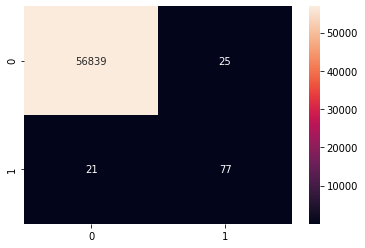

In [75]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")

test_score = accuracy_score(y_pred, y_test)
balanced_score = balanced_accuracy_score(y_test, y_pred)

print('MLP training score', max(history.history['binary_accuracy']))
print('MLP validation score: ', test_score)
print('MLP balanced accuracy validation score: ', balanced_score)


matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='2.0f')
plt.show()